Import relevant packages here.

In [5]:
import matplotlib.pyplot as plt

Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [6]:
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('C:\\Users\\user\\Downloads\\cf_data.csv')

# Display the first few rows to verify it is loaded correctly
print(data.head())

         dv        s         a
0 -0.743240  53.5427  1.242570
1 -0.557230  53.6120  1.777920
2 -0.454769  53.6541  0.544107
3 -0.525396  53.7030 -0.294755
4 -0.601285  53.7592 -0.290961


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [7]:
import numpy as np

# Create dv array with values from -10 to 10 with 41 evenly spaced values
dv = np.linspace(-10, 10, 41)

# Create s array with values from 0 to 200 with 21 evenly spaced values
s = np.linspace(0, 200, 21)

# Create a grid a initialised with zeros, with shape (length of dv, length of s)
a = np.zeros((len(dv), len(s)))

# Display the shapes of dv, s, and a to verify
print(f'dv shape: {dv.shape}, s shape: {s.shape}, a shape: {a.shape}')

dv shape: (41,), s shape: (21,), a shape: (41, 21)


Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [8]:
# using the dataframe is named 'data' and has columns named 'dv', 's', and 'a'
DV = data.dv.to_numpy()  # Convert 'dv' column to a NumPy array
S = data.s.to_numpy()    
A = data.a.to_numpy()    

# display the arrays to verify
print(f'DV: {DV[:5]}')  # Display first 5 elements
print(f'S: {S[:5]}')
print(f'A: {A[:5]}')

DV: [-0.74324  -0.55723  -0.454769 -0.525396 -0.601285]
S: [53.5427 53.612  53.6541 53.703  53.7592]
A: [ 1.24257   1.77792   0.544107 -0.294755 -0.290961]


Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [16]:
import math

# parameters
upsilon = 1.5
sigma = 30

# reshape the DV and S arrays for correct broadcasting
DV_reshaped = DV[:50].reshape(50, 1, 1)
S_reshaped = S[:50].reshape(50, 1, 1)

# precompute the weights for the first 50 measurements
weights = np.exp(
    -0.5 * (
        ((dv[:, None] - DV_reshaped) / upsilon) ** 2 +
        ((s[None, :] - S_reshaped) / sigma) ** 2
    )
)


# loop trough each of the grid
for i in range(len(dv)):
    for j in range(len(s)):
# Calculate the weighted mean for the grid point
        numerator = np.sum(weights[:, i, j] * A[:50])
        denominator = np.sum(weights[:, i, j])
        if denominator != 0:
            a[i, j] = numerator / denominator
        else:
            a[i, j] = 0
        
    print(f"row {i + 1} out of {len(dv)}")

row 1 out of 41
row 2 out of 41
row 3 out of 41
row 4 out of 41
row 5 out of 41
row 6 out of 41
row 7 out of 41
row 8 out of 41
row 9 out of 41
row 10 out of 41
row 11 out of 41
row 12 out of 41
row 13 out of 41
row 14 out of 41
row 15 out of 41
row 16 out of 41
row 17 out of 41
row 18 out of 41
row 19 out of 41
row 20 out of 41
row 21 out of 41
row 22 out of 41
row 23 out of 41
row 24 out of 41
row 25 out of 41
row 26 out of 41
row 27 out of 41
row 28 out of 41
row 29 out of 41
row 30 out of 41
row 31 out of 41
row 32 out of 41
row 33 out of 41
row 34 out of 41
row 35 out of 41
row 36 out of 41
row 37 out of 41
row 38 out of 41
row 39 out of 41
row 40 out of 41
row 41 out of 41


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

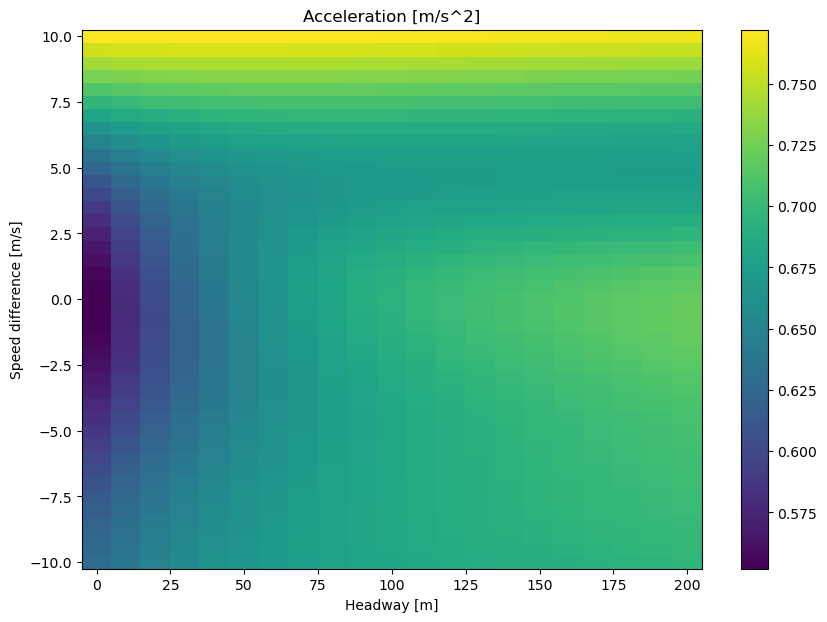

In [10]:
X, Y = np.meshgrid(s, dv)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, a, shading='auto')
ax.set_title('Acceleration [m/s^2]')
ax.set_xlabel('Headway [m]')
ax.set_ylabel('Speed difference [m/s]')
fig.colorbar(p, ax=ax)
fig.set_size_inches(10, 7)
plt.show()